In [1]:
import tensorflow as tf
from keras.layers import Input, Flatten, Dense
from keras.utils import plot_model
from keras import optimizers, losses
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dataset loading
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# train data splitting
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

# data scaling
X_train, X_val, X_test = X_train/255, X_val/255, X_test/255

In [4]:
# class definition
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# model creation function
def create_model() :
    tf.random.set_seed(42)

    model = tf.keras.Sequential()
    model.add(Input(shape = [28, 28]))

    model.add(Flatten())
    model.add(Dense(300, activation = "relu"))
    model.add(Dense(100, activation = "relu"))
    model.add(Dense(10, activation = "softmax"))

    plot_model(model, to_file = "model_fashion_mnist.png", show_shapes = True)

    model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

    return model

In [5]:
# model fitting
model = create_model()
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6858 - loss: 0.9878 - val_accuracy: 0.8298 - val_loss: 0.5028
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.5038 - val_accuracy: 0.8402 - val_loss: 0.4551
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8446 - loss: 0.4513 - val_accuracy: 0.8464 - val_loss: 0.4313
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4213 - val_accuracy: 0.8502 - val_loss: 0.4170
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8598 - loss: 0.4003 - val_accuracy: 0.8528 - val_loss: 0.4068
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3840 - val_accuracy: 0.8566 - val_loss: 0.3972
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8705 - loss: 0.3701 - val_accuracy: 0.8570 - val_loss: 0.3893
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.3579 - 

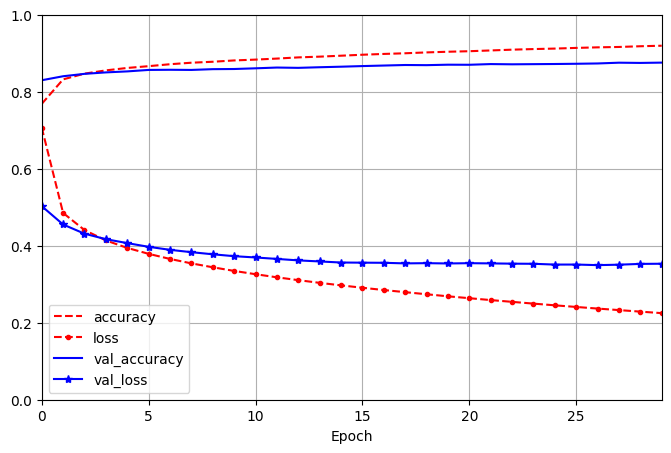

In [6]:
# history plotting
pd.DataFrame(history.history).plot(figsize = (8, 5), xlim = [0, 29], ylim = [0, 1], grid = True, xlabel = "Epoch", style = ["r--", "r--.", "b-", "b-*"])
plt.show()

In [13]:
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9070 - loss: 0.2544


[0.25418370962142944, 0.9066181778907776]

---

# GRID SEARCH

---

In [4]:
# model creation function
def create_model_GridSearch(learning_rate, optimizer, neurons, activations, loss) :
    if len(neurons) != len(activations) :
        return print("The number of activation functions is different from the number of layers")

    tf.random.set_seed(42)

    model = tf.keras.Sequential()
    model.add(Input(shape = [28, 28]))

    model.add(Flatten())

    for i in range (len(neurons)) :
        model.add(Dense(neurons[i], activation = activations[i]))

    model.add(Dense(10, activation = "softmax"))

    model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss, metrics = ["accuracy"])

    return model

In [5]:
# params definition
n_epochs_list = [20, 50, 100]
learning_rate_list = [0.001, 0.01, 0.02]
optimizer_list = [optimizers.SGD, optimizers.RMSprop]
loss_list = [losses.sparse_categorical_crossentropy]
neurons_list = [[100, 10], [300, 200, 100]]
activations_list = [["relu"]*2, ["relu", "sigmoid", "relu"]]

epochs =  20 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


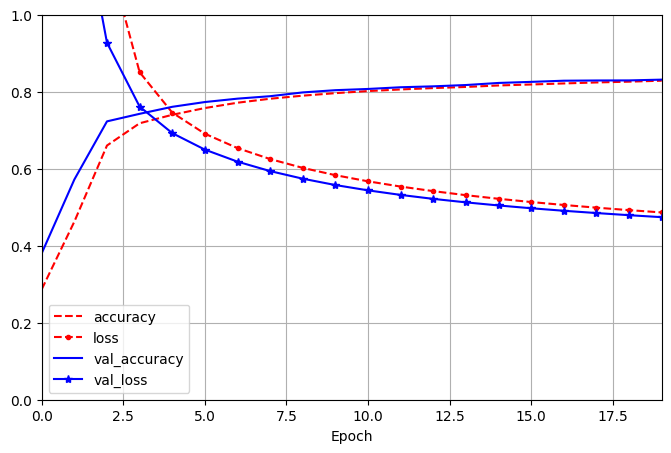

epochs =  20 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


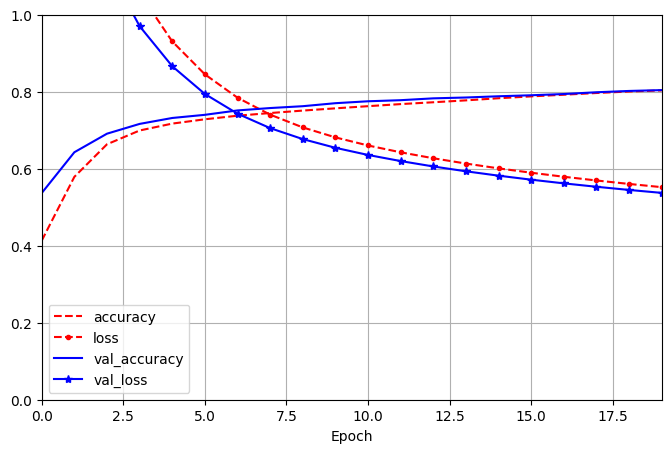

epochs =  20 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


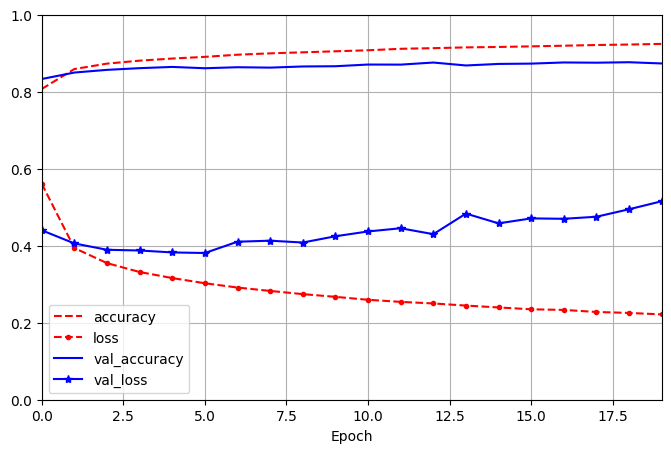

epochs =  20 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


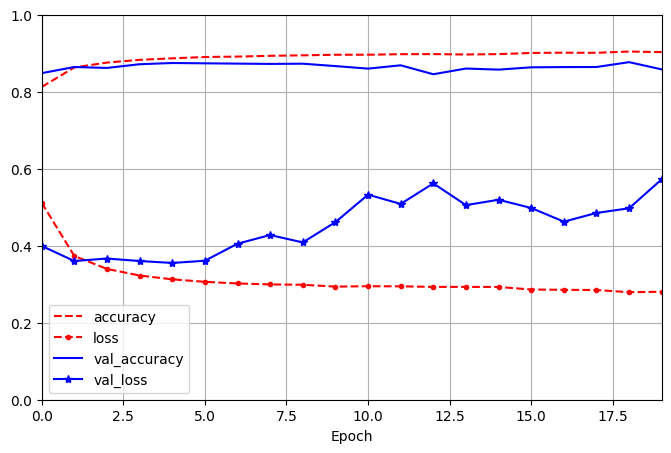

epochs =  20 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


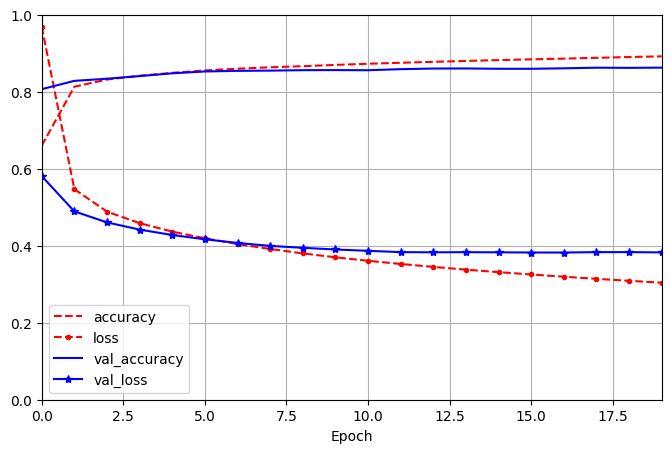

epochs =  20 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


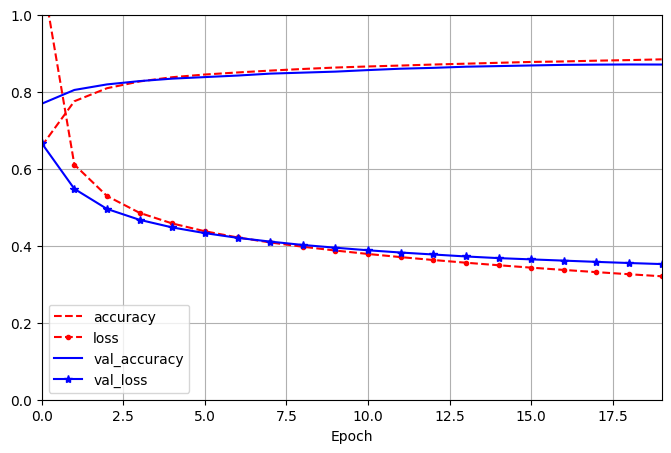

epochs =  20 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


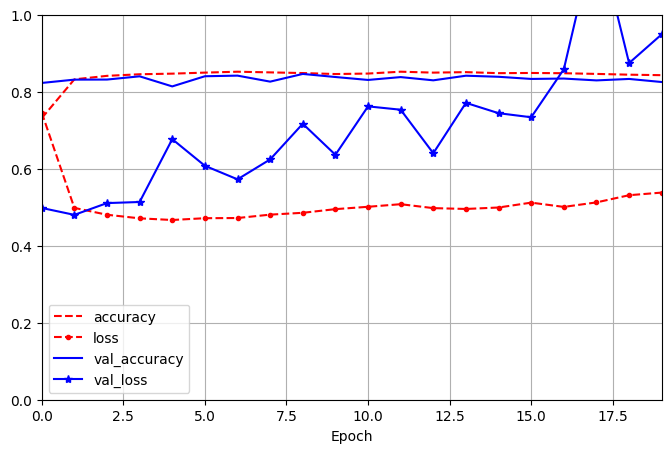

epochs =  20 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


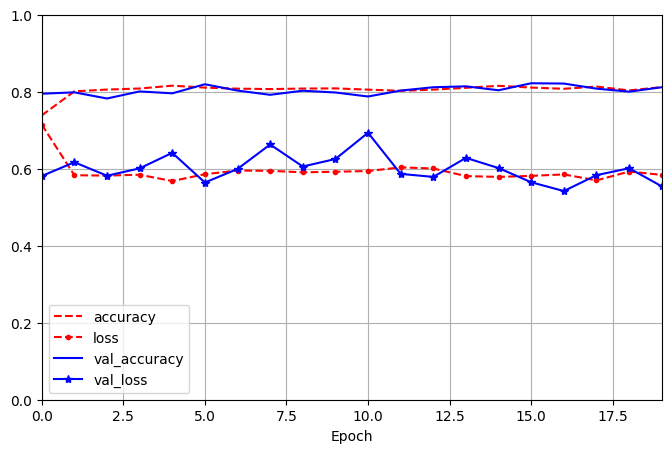

epochs =  20 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


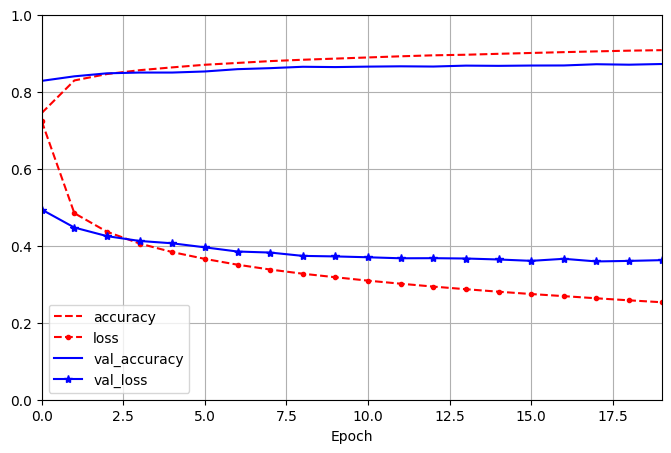

epochs =  20 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


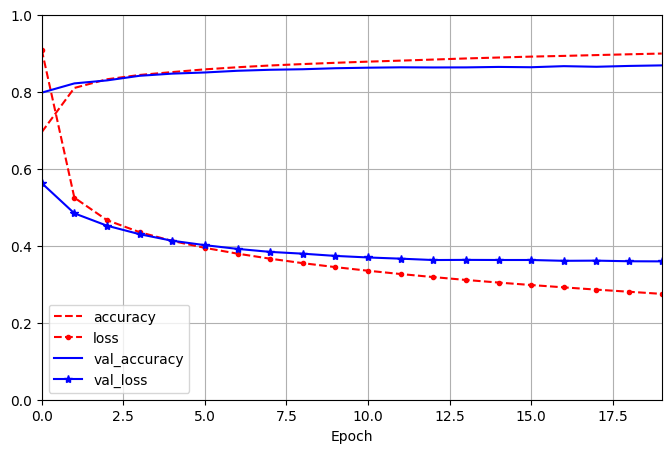

epochs =  20 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


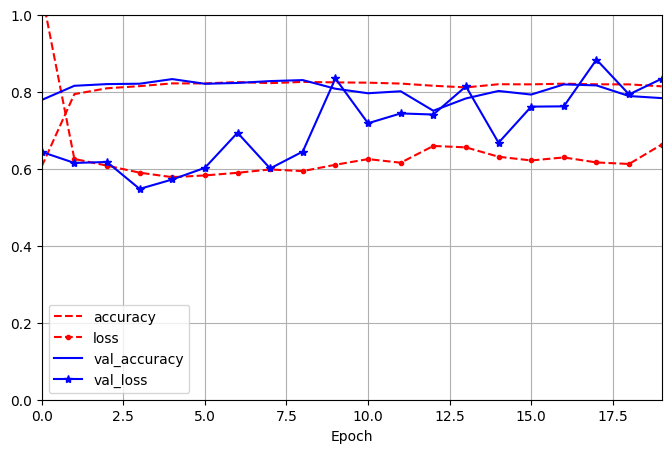

epochs =  20 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


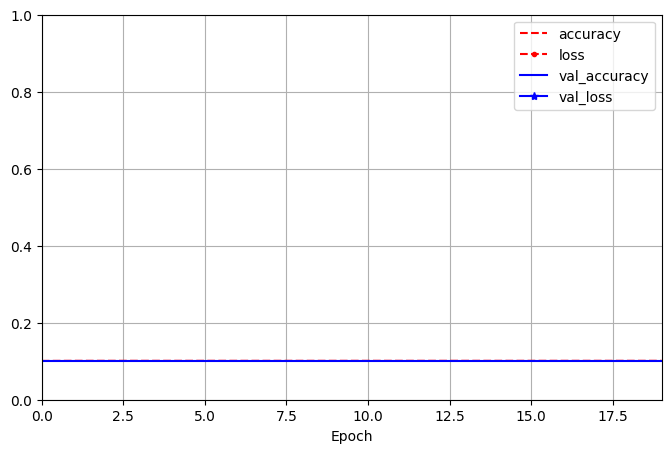

epochs =  50 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


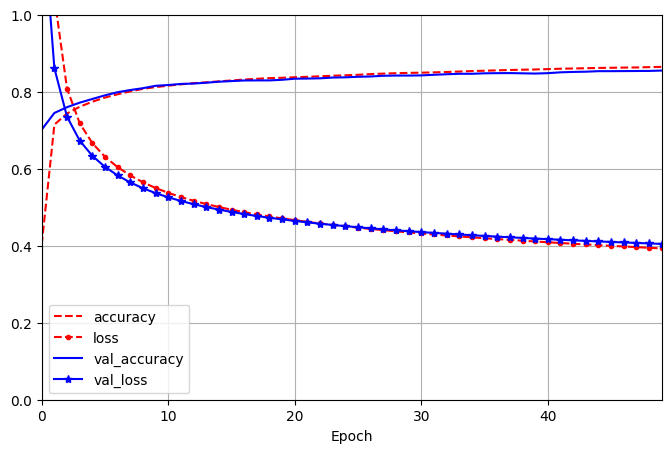

epochs =  50 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


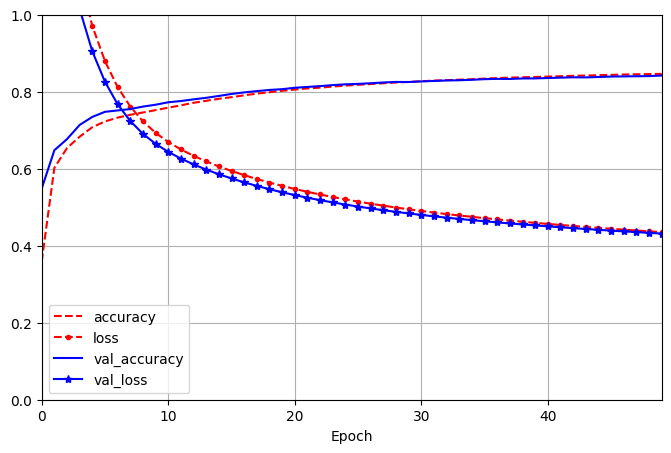

epochs =  50 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


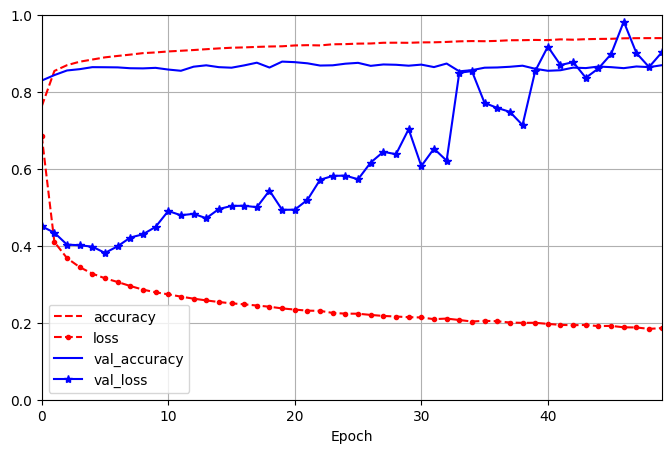

epochs =  50 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


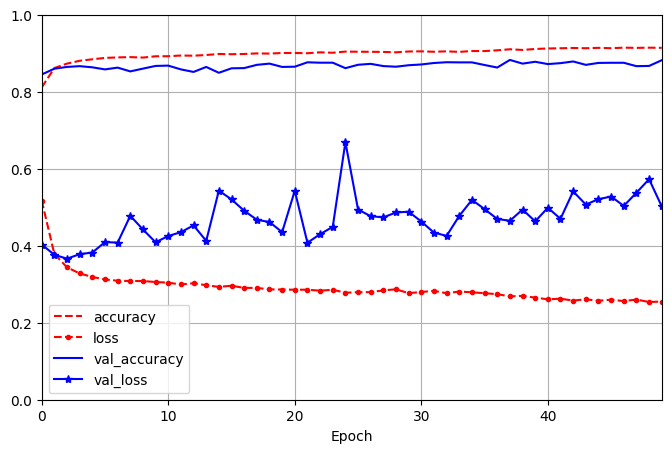

epochs =  50 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


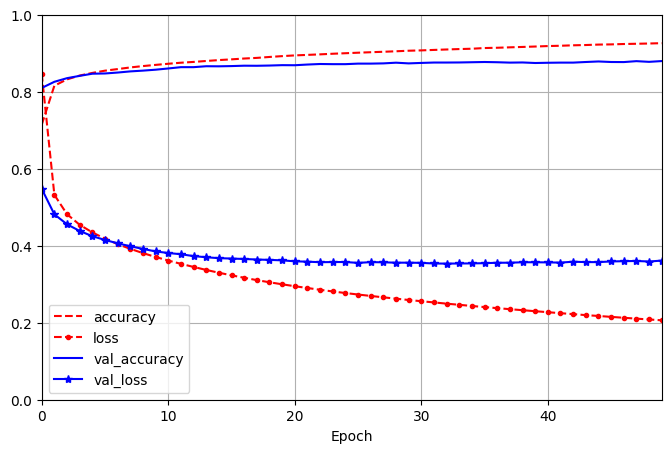

epochs =  50 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


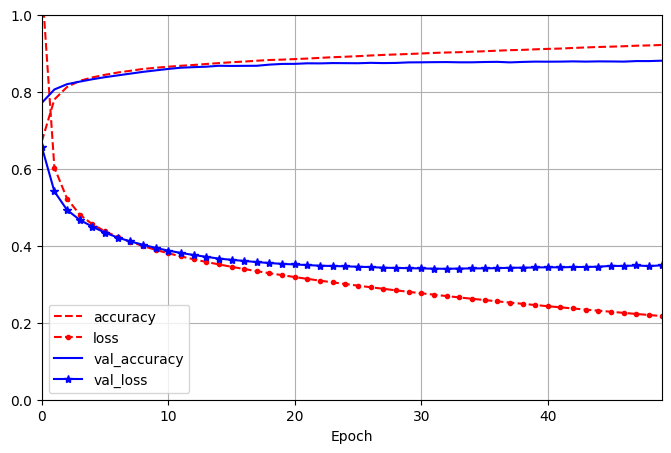

epochs =  50 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


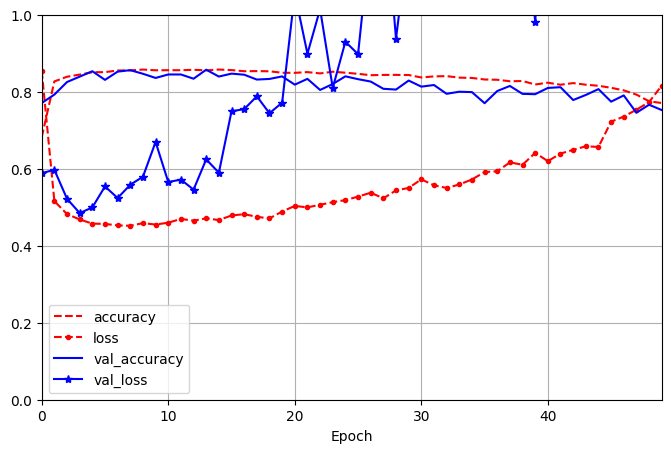

epochs =  50 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


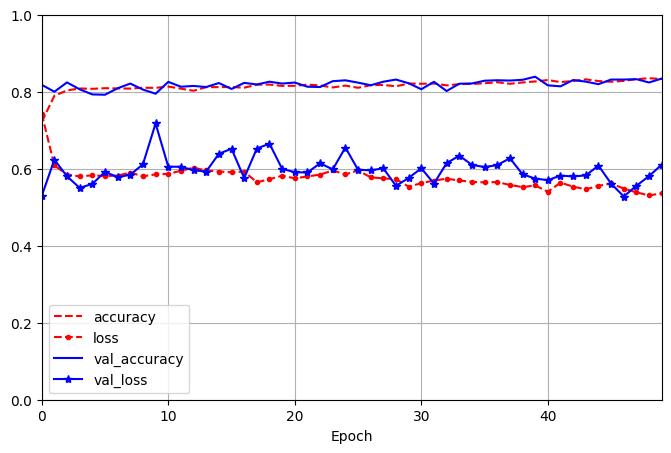

epochs =  50 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


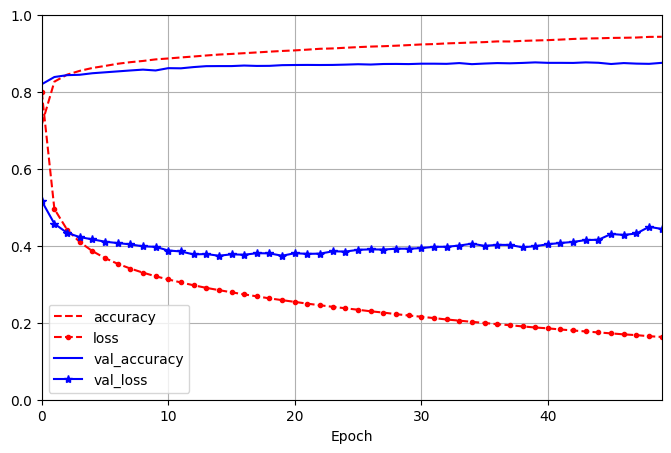

epochs =  50 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


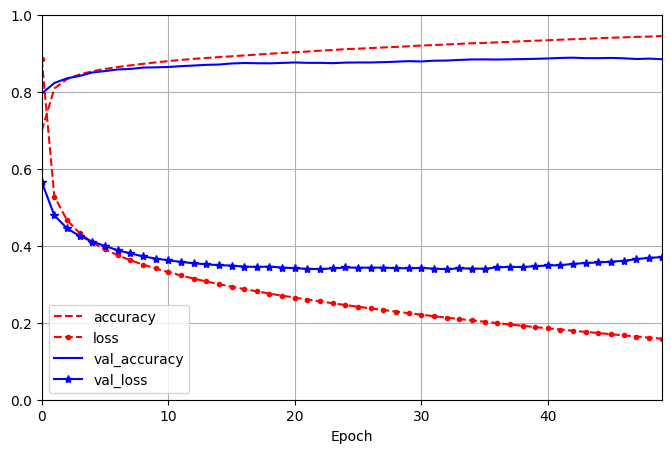

epochs =  50 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


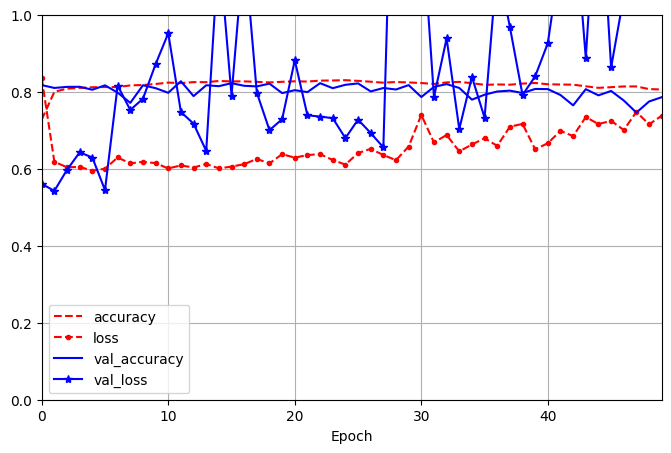

epochs =  50 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


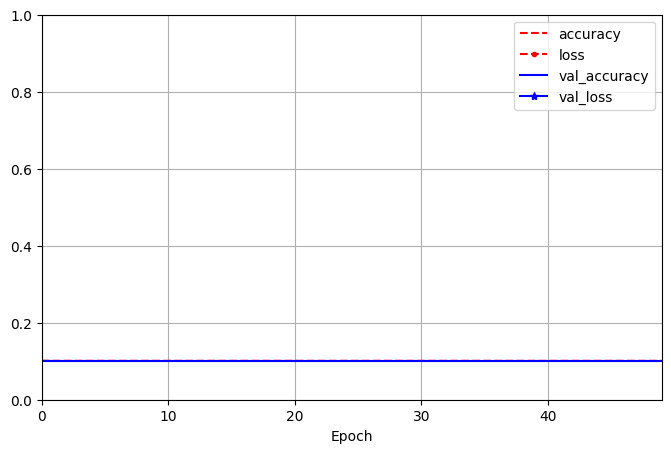

epochs =  100 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


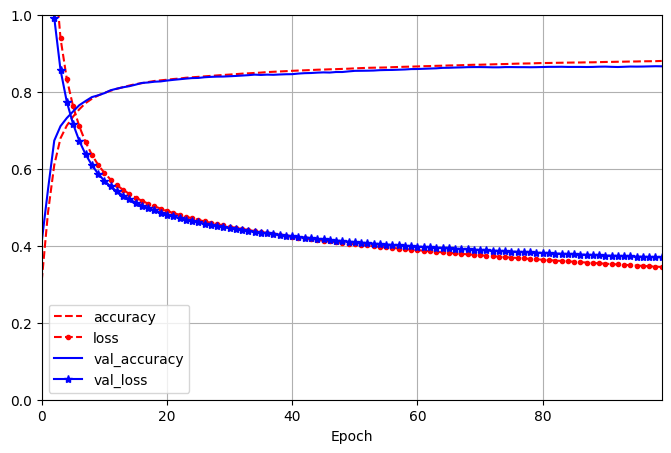

epochs =  100 	learning_rate =  0.001 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


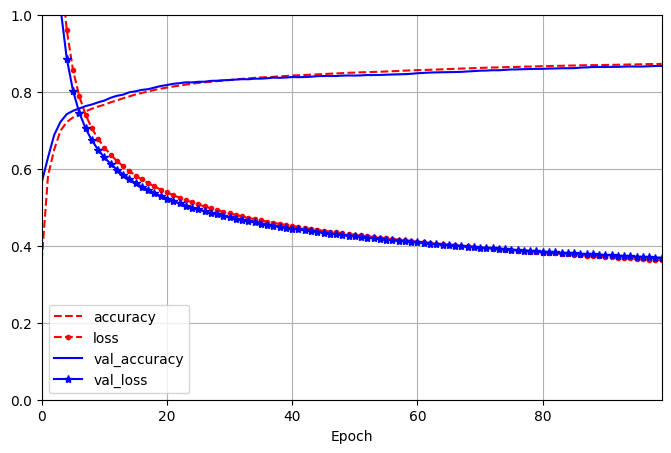

epochs =  100 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


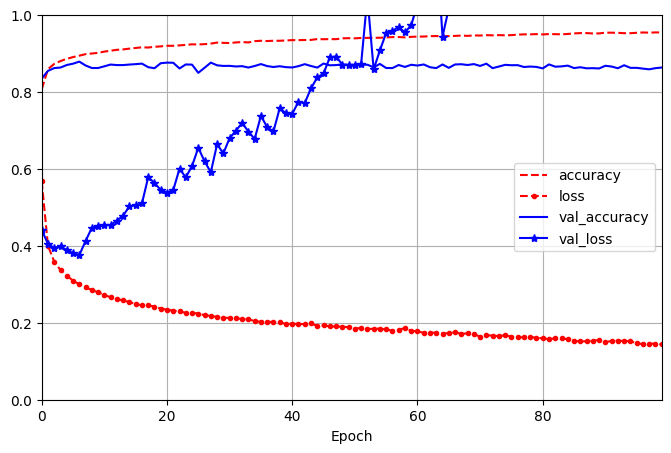

epochs =  100 	learning_rate =  0.001 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


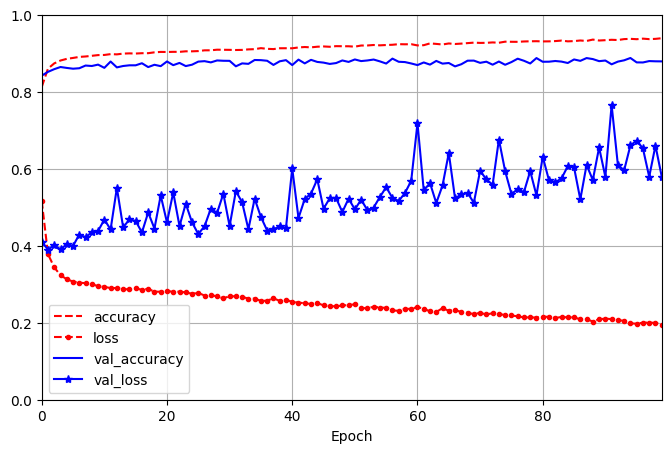

epochs =  100 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


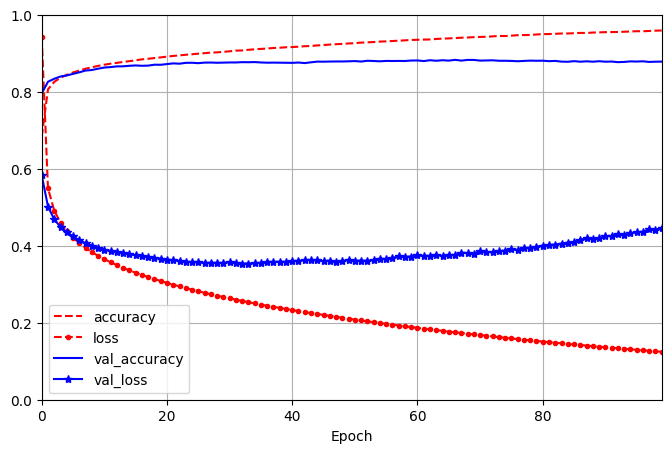

epochs =  100 	learning_rate =  0.01 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


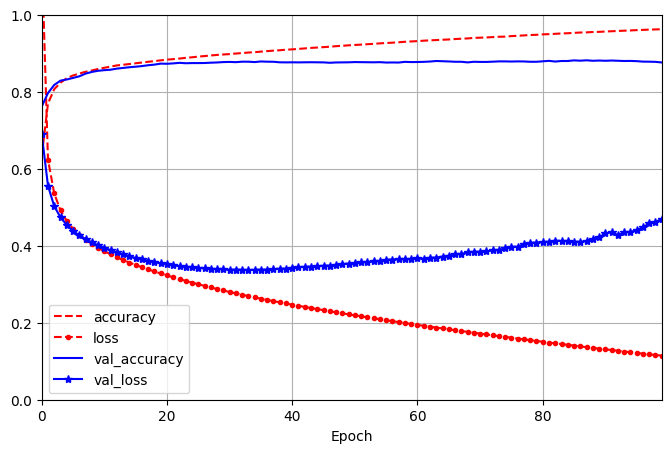

epochs =  100 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


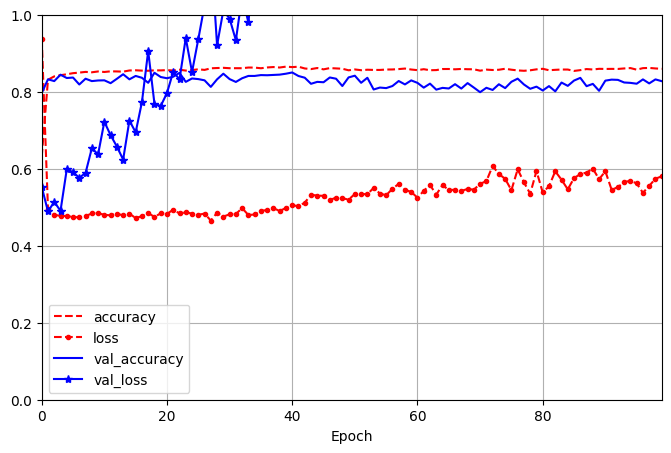

epochs =  100 	learning_rate =  0.01 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


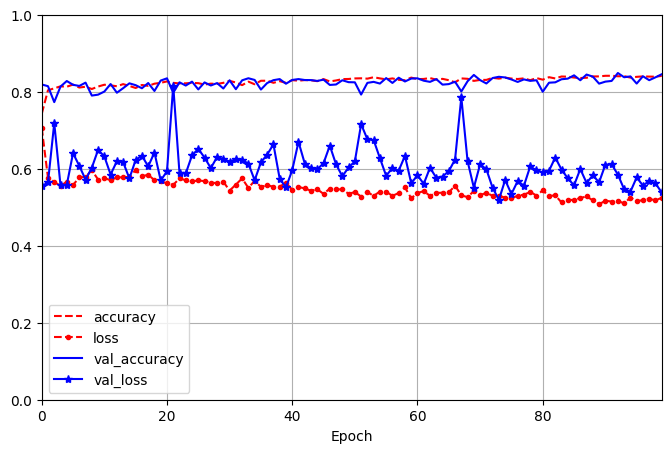

epochs =  100 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


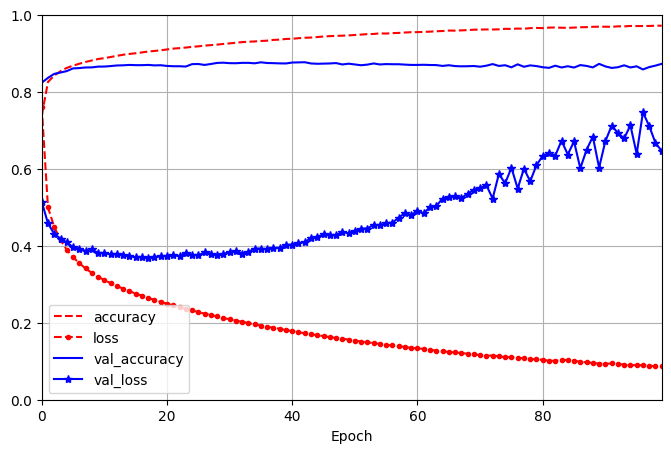

epochs =  100 	learning_rate =  0.02 	optimizer =  SGD 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


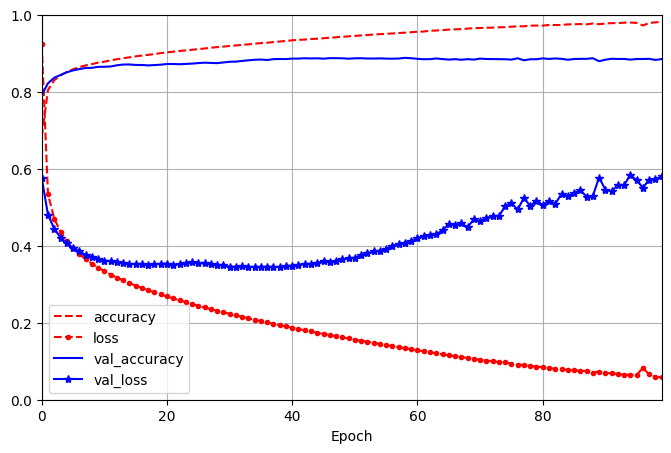

epochs =  100 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [100, 10] 	activations =  ['relu', 'relu'] 	loss =  sparse_categorical_crossentropy


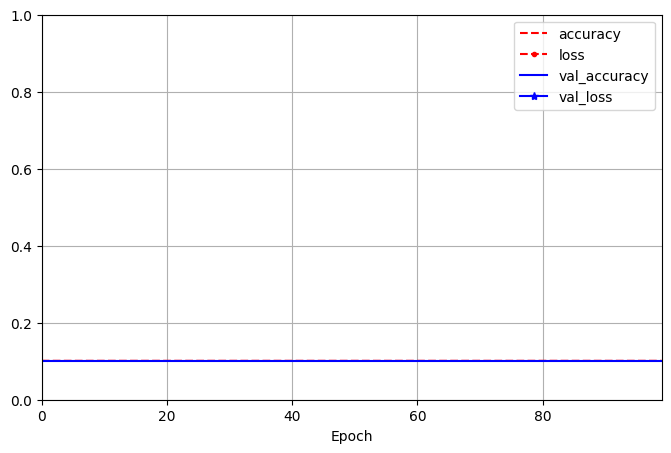

epochs =  100 	learning_rate =  0.02 	optimizer =  RMSprop 	neurons =  [300, 200, 100] 	activations =  ['relu', 'sigmoid', 'relu'] 	loss =  sparse_categorical_crossentropy


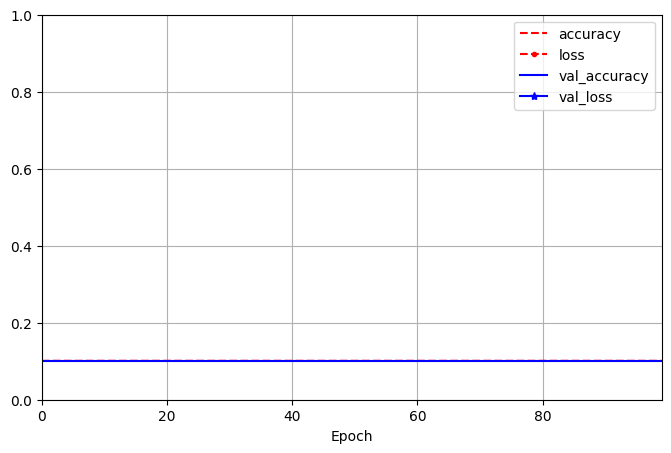

In [8]:
# grid search

for epochs in n_epochs_list :
    for learning_rate in learning_rate_list :
        for optimizer in optimizer_list :
            for loss in loss_list :
                for neur_act_count in range (len(neurons_list)) :
                        # model fitting
                        model = create_model_GridSearch(learning_rate = learning_rate, optimizer = optimizer, neurons = neurons_list[neur_act_count], activations = activations_list[neur_act_count], loss = loss)
                        history = model.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data = (X_val, y_val), verbose = 0)

                        # results plotting
                        print("epochs = ", epochs, "\tlearning_rate = ", learning_rate, "\toptimizer = ", optimizer.__name__, "\tneurons = ", neurons_list[neur_act_count], "\tactivations = ",
                              activations_list[neur_act_count], "\tloss = ", loss.__name__)
                        model_evaluation = model.evaluate(X_test, y_test)
                        print("test_loss : ", model_evaluation[0], "test_accuracy : ", model_evaluation[1])
                        pd.DataFrame(history.history).plot(figsize = (8, 5), xlim = [0, epochs - 1], ylim = [0, 1], grid = True, xlabel = "Epoch", style = ["r--", "r--.", "b-", "b-*"])
                        plt.show()